Dataset Loaded Successfully!
Shape: (284807, 31)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 

/var/folders/26/g387rzhj7qld9w2h5fxyc_080000gn/T/ipykernel_5891/1163734949.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")


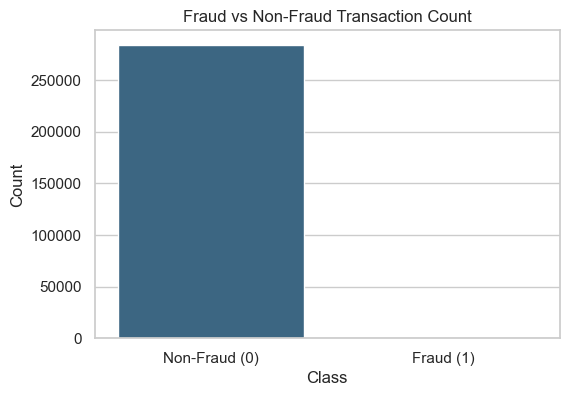


Fraud Cases: 492 (0.1727%)
Non-Fraud Cases: 284315 (99.8273%)


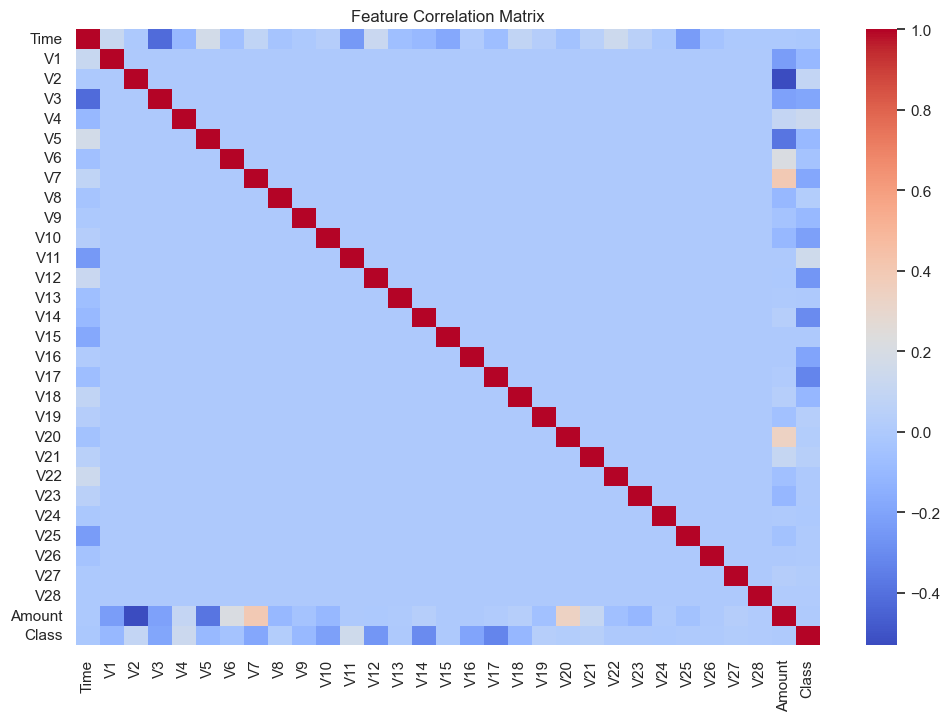


--- Top Features Correlated with Fraud (Class=1) ---
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

EDA summary saved to ../data/processed/eda_summary.csv


In [1]:
# 01_data_exploration.ipynb

# ==================================================
#  PHASE 1: DATA EXPLORATION - Credit Card Fraud Dataset
# ==================================================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2. Load dataset
DATA_PATH = Path("../data/raw/creditcard.csv")  # Adjust path if needed
df = pd.read_csv(DATA_PATH)

print("Dataset Loaded Successfully!")
print(f"Shape: {df.shape}")
df.head()

# 3. Basic dataset info
print("\n--- Dataset Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False).head())

# 4. Fraud vs Non-Fraud distribution
fraud_counts = df['Class'].value_counts()
fraud_percent = fraud_counts / len(df) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.show()

print(f"\nFraud Cases: {fraud_counts[1]} ({fraud_percent[1]:.4f}%)")
print(f"Non-Fraud Cases: {fraud_counts[0]} ({fraud_percent[0]:.4f}%)")

# 5. Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

# Top correlations with target variable
target_corr = corr['Class'].sort_values(ascending=False)
print("\n--- Top Features Correlated with Fraud (Class=1) ---")
print(target_corr.head(10))

# 6. Save quick summary
summary_path = Path("../data/processed/eda_summary.csv")
summary = {
    "n_rows": [df.shape[0]],
    "n_columns": [df.shape[1]],
    "n_missing_values": [df.isnull().sum().sum()],
    "fraud_cases": [fraud_counts[1]],
    "fraud_percentage": [fraud_percent[1]],
}
pd.DataFrame(summary).to_csv(summary_path, index=False)
print(f"\nEDA summary saved to {summary_path}")
